In [3]:
# test functions
from spaces.threeD import State
from spaces.twoD import SGDVisOneVariable

# Momentum

In [4]:
# 3d surfaces
# test functions
from spaces.threeD import State
from spaces.twoD import SGDVisOneVariable

state = State(
    space_lim_min=-7,
    space_lim_max=7,
    x_initial=-6,
    y_initial=0,
    test_function="himmelblau",
    iteration=128,
)

steps_standard = state.run_gd(epsilon=0.001, alpha=0.9, nesterov=False)
steps_nesterov = state.run_gd(epsilon=0.001, alpha=0.9, nesterov=True)
steps_adam = state.run_adam(epsilon=0.01)
steps_adagrad = state.run_adagrad(epsilon=1)

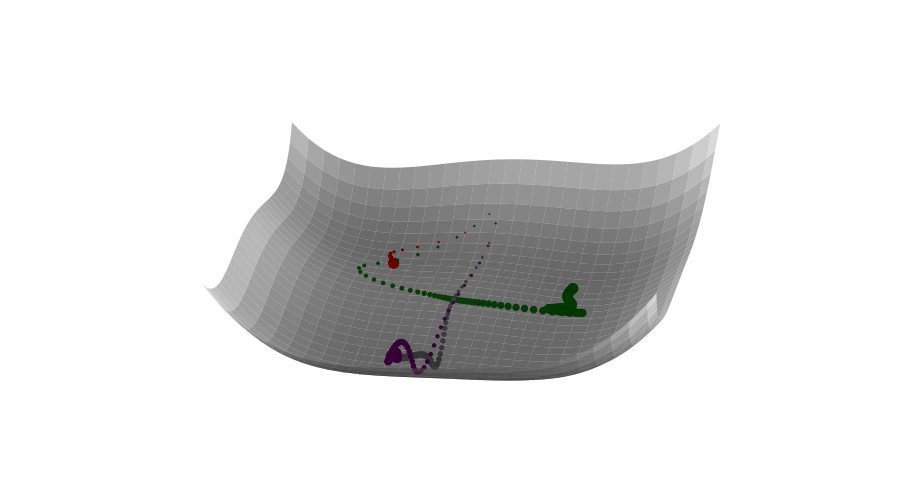

In [5]:
state.plot_steps(
    [steps_standard, steps_nesterov, steps_adam, steps_adagrad],
    colors=["purple", "gray", "green", "red"],
    steps_until_n=90,
    n_back=90,
)

In [42]:
for i in range(120):
    file_path = "frames/plot_{0:03}.png".format(i)
    fig = h.plot_steps(
        [steps_standard],
        steps_until_n=i,
        azimuth=5 + 5 * math.log(i + 1),
        elevation=20 + 5 * math.log(i + 1),
        color_map=cm.gray,
        n_back=20,
        plot_title="Gradient Descent with Momentum",
        colors=["gray", "red"],
    )
    fig.savefig(file_path)

In [43]:
video = Video(dir_to_save="frames", video_name=FILE_NAME_WO_EXTENSION, frame_rate=29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save="", frame_rate=29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('momentum.gif' from 'momentum.mp4')